In [3]:
import json
import os
import matplotlib.pyplot as plt


In [4]:
category_map = {

    3: 'helmet',
    5: 'no-helmet',
    6: 'no-vest',
    7: 'vest'
}

In [30]:
def plot_label_distribution(json_file_paths):
    """
    Plot the distribution of labels in the given datasets using pie charts.

    Args:
        json_file_paths (list of str): List of file paths to JSON annotation files for each dataset.
    """
    # Dictionary to store label counts across all datasets
    all_label_counts = {}

    # Dictionary to store total number of images in each dataset
    total_images_counts = {}


    # Iterate through each dataset
    for file_path in json_file_paths:
        # Load JSON data
        with open(file_path, 'r') as file:
            data = json.load(file)


        # Extract annotations from the dataset
        annotations = data['annotations']


        # Dictionary to store label counts for the current dataset
        label_counts = {}


        # Count occurrences of each label in the current dataset
        for annotation in annotations:
            category_id = annotation['category_id']
            label = category_map[category_id]  # Assuming category_map is defined
            label_counts[label] = label_counts.get(label, 0) + 1


            # Update overall label counts
            all_label_counts[label] = all_label_counts.get(label, 0) + 1


        # Calculate total number of images in the current dataset
        total_images_counts[os.path.basename(os.path.dirname(file_path))] = len(data['images'])


        # Plot pie chart for the current dataset
        plt.figure(figsize=(12, 6))


        # Plot pie chart
        plt.subplot(1, 2, 1)
        plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of Labels in {os.path.basename(os.path.dirname(file_path))} Dataset')


        # Add total number of images as text
        plt.subplot(1, 2, 2)
        plt.text(0.5, 0.5, f'Total Images: {total_images_counts[os.path.basename(os.path.dirname(file_path))]}', fontsize=12,
                 ha='center')
        plt.axis('off')

        plt.show()


    # Plot overall pie chart for all datasets combined
    plt.figure(figsize=(12, 6))

    # Plot pie chart
    plt.subplot(1, 2, 1)
    plt.pie(all_label_counts.values(), labels=all_label_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Overall Distribution of Labels in the Dataset')

    # Add total number of images as text
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f'Total Images: {sum(total_images_counts.values())}', fontsize=12, ha='center')
    plt.axis('off')

    plt.show()


In [31]:
# Path to JSON annotation files for train, test, and validation sets

train_json_path = "/home/hamza/protection_gear_detector/Dataset/train/updated_annotations.json"
test_json_path = "/home/hamza/protection_gear_detector/Dataset/test/filtered_annotations.json"
valid_json_path = "/home/hamza/protection_gear_detector/Dataset/valid/updated_annotations.json"

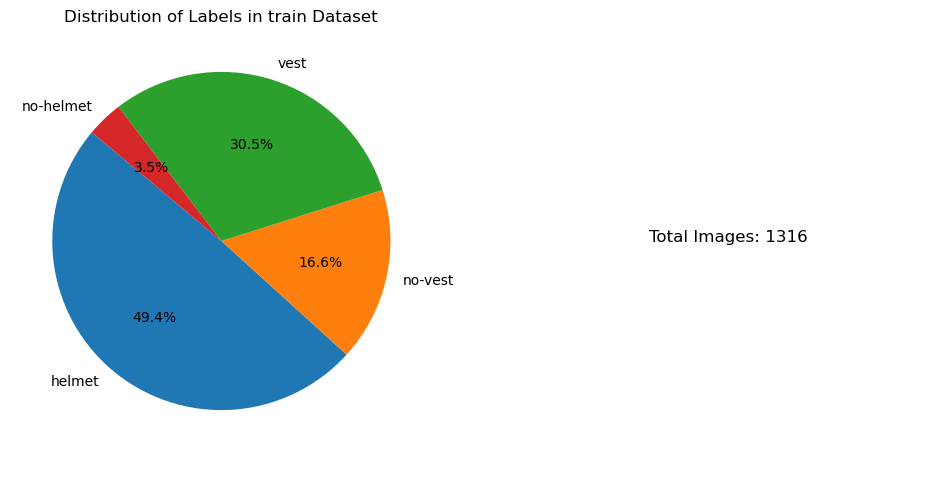

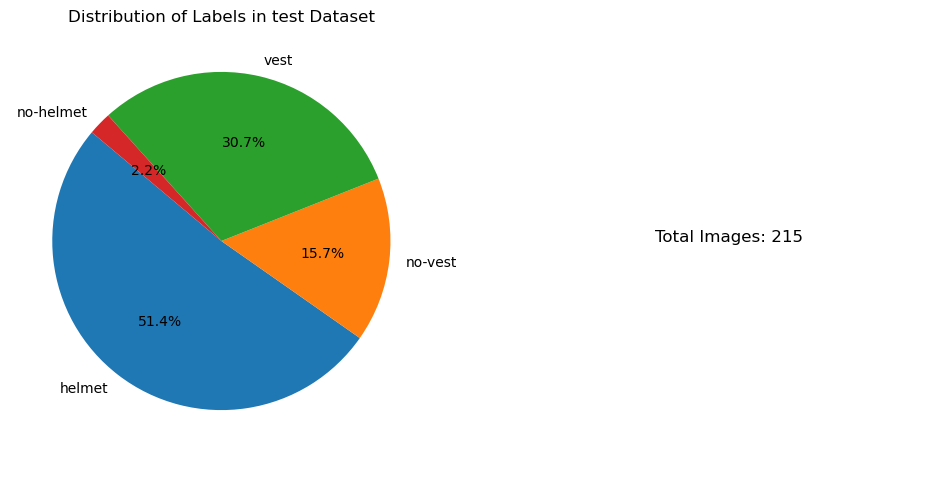

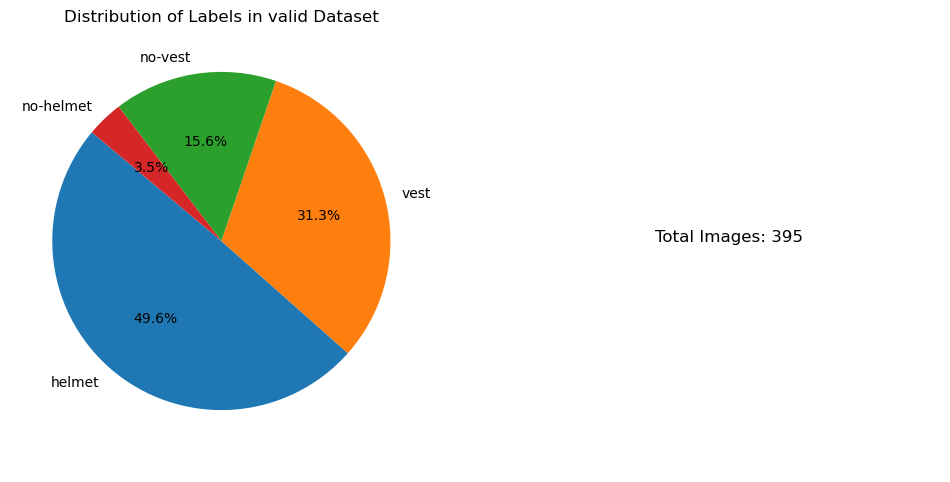

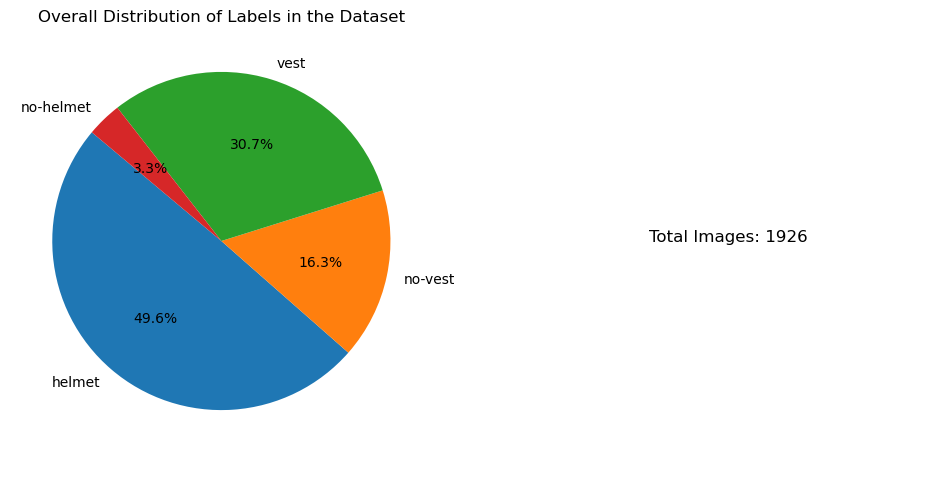

In [32]:
plot_label_distribution([train_json_path, test_json_path, valid_json_path])
